In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

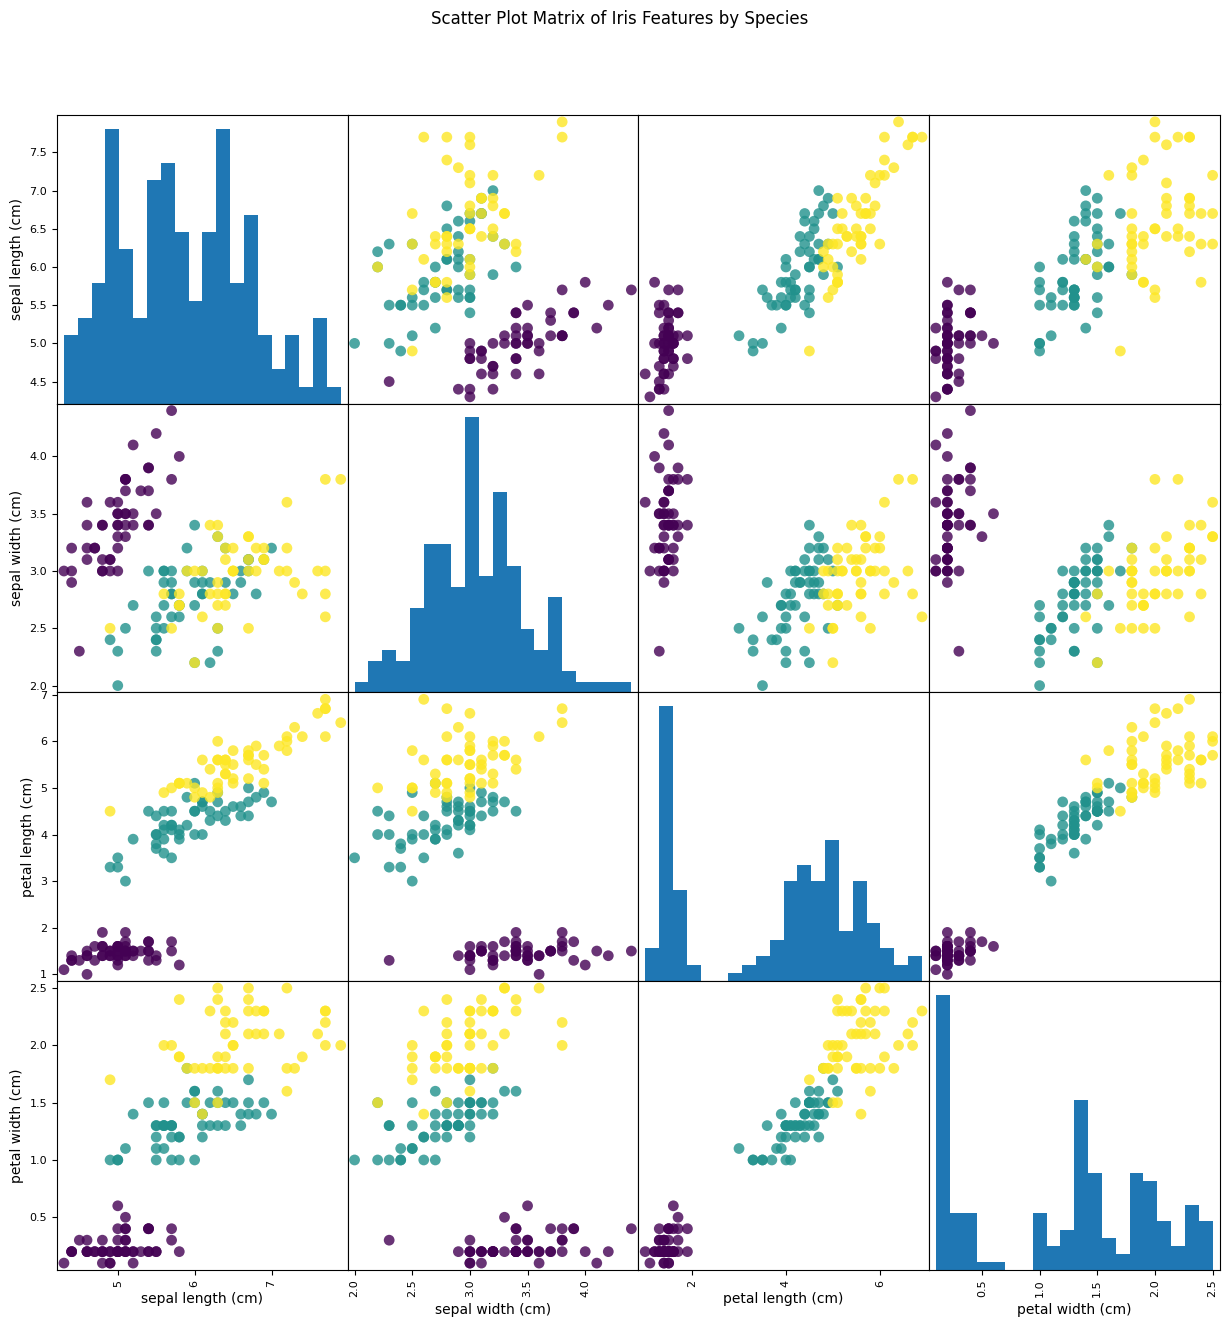

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target integers to species names for better visualization
df['species'] = df['species'].apply(lambda x: iris.target_names[x])

# Generate scatter plot matrix
scatter_matrix(df, c=df['species'].astype('category').cat.codes, figsize=(15, 15), marker='o',
               hist_kwds={'bins': 20}, s=60, alpha=.8)

plt.suptitle('Scatter Plot Matrix of Iris Features by Species', y=0.95)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [4]:
from sklearn.feature_selection import SelectKBest, f_classif

# Instantiate SelectKBest with f_classif and k=2
selector = SelectKBest(score_func=f_classif, k=2)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Transform the training and testing data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print("Original X_train shape:", X_train.shape)
print("X_train_selected shape:", X_train_selected.shape)
print("Original X_test shape:", X_test.shape)
print("X_test_selected shape:", X_test_selected.shape)

Original X_train shape: (120, 4)
X_train_selected shape: (120, 2)
Original X_test shape: (30, 4)
X_test_selected shape: (30, 2)


In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Instantiate models
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train models
random_forest_model.fit(X_train_selected, y_train)
gradient_boosting_model.fit(X_train_selected, y_train)

print("Random Forest Model trained successfully.")
print("Gradient Boosting Model trained successfully.")

Random Forest Model trained successfully.
Gradient Boosting Model trained successfully.


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_selected)
y_pred_gb = gradient_boosting_model.predict(X_test_selected)

# Evaluate Random Forest Model
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\n" + "="*50 + "\n") # Separator for clarity

# Evaluate Gradient Boosting Model
print("Gradient Boosting Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Random Forest Model Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Gradient Boosting Model Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0 